In [130]:
import glob, os, random
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [131]:
labels_path = 'C:/Users/HW-Steve/Desktop/DATA/DAVIS/Annotations/480p/'
imgs_path = 'C:/Users/HW-Steve/Desktop/DATA/DAVIS/JPEGImages/480p/'

In [132]:
labels_dir_list = os.listdir(labels_path)
imgs_dir_list = os.listdir(imgs_path)

In [133]:
len(imgs_list[:skip_frame])

2

In [134]:
skip_frame = 2   # frame skip for dynamic moving

data_list = []

imgs_lists = []
labels_lists = []
target_imgs_lists = []
target_labels_lists = []

for i in range(len(imgs_dir_list)):
    imgs_list = sorted(glob.glob(os.path.join(imgs_path, imgs_dir_list[i]) +'/*.jpg'))
    labels_list = sorted(glob.glob(os.path.join(labels_path, labels_dir_list[i]) +'/*.png'))
    
    imgs_lists += imgs_list[:-skip_frame] + list(reversed(imgs_list))[:-skip_frame] # t-1 frame image 
    labels_lists += labels_list[:-skip_frame] + list(reversed(labels_list))[:-skip_frame] # t-1 frame label
    target_imgs_lists += imgs_list[skip_frame:] + list(reversed(imgs_list))[skip_frame:] # target frame image
    target_labels_lists += labels_list[:-skip_frame] + list(reversed(labels_list))[skip_frame:] # t-1 frame label
    
data_list.append(imgs_lists)  
data_list.append(labels_lists)  
data_list.append(target_imgs_lists)  
data_list.append(target_labels_lists)  

data_list = np.array(data_list)

In [136]:
labels_path = 'C:/Users/HW-Steve/Desktop/DATA/DAVIS/Annotations/480p/'
imgs_path = 'C:/Users/HW-Steve/Desktop/DATA/DAVIS/JPEGImages/480p/'
skip_frame = 2   # frame skip for dynamic moving
batch_size = 16

In [142]:
def augment_func(img): # normalized images 0 to 1
    return img

In [179]:
def data_generator(imgs_path, labels_path, batch_size = 16, augment = True):
    
    data_list = []
    imgs_lists = []
    labels_lists = []
    target_imgs_lists = []
    target_labels_lists = []

    for i in range(len(imgs_dir_list)):
        imgs_list = sorted(glob.glob(os.path.join(imgs_path, imgs_dir_list[i]) +'/*.jpg'))
        labels_list = sorted(glob.glob(os.path.join(labels_path, labels_dir_list[i]) +'/*.png'))

        imgs_lists += imgs_list[:-skip_frame] + list(reversed(imgs_list))[:-skip_frame] # t-1 frame image 
        labels_lists += labels_list[:-skip_frame] + list(reversed(labels_list))[:-skip_frame] # t-1 frame label
        target_imgs_lists += imgs_list[skip_frame:] + list(reversed(imgs_list))[skip_frame:] # target frame image
        target_labels_lists += labels_list[:-skip_frame] + list(reversed(labels_list))[skip_frame:] # t-1 frame label

    data_list.append(imgs_lists)  
    data_list.append(labels_lists)  
    data_list.append(target_imgs_lists)  
    data_list.append(target_labels_lists)  
    data_list = np.array(data_list)
    
#     print(data_list.shape)

    idx = 0
    while 1:
        idx_list = list(range(data_list.shape[1])) # random shuffle index generation
        random.shuffle(idx_list)
        
        batch_imgs = [] # batch images list
        batch_labs = []
        
        if idx > len(idx_list) - batch_size:
            tmp_list = idx_list[idx:]
            idx = 0
        else:
            tmp_list = idx_list[idx:idx+batch_size] # end of list batch 
            idx = idx + batch_size

        for i in tmp_list:
            img_tmp = cv2.imread(data_list[0,i])
            lab_tmp = cv2.imread(data_list[1,i])
            target_tmp = cv2.imread(data_list[2,i])
            target_lab_tmp = cv2.imread(data_list[3,i])
            
            img = cv2.cvtColor(img_tmp, cv2.COLOR_BGR2RGB)/255. # input
            lab = cv2.cvtColor(lab_tmp, cv2.COLOR_BGR2RGB)/255. # input
            target = cv2.cvtColor(target_tmp, cv2.COLOR_BGR2RGB)/255. # input
            target_lab_tmp = cv2.cvtColor(target_lab_tmp, cv2.COLOR_BGR2GRAY)/255. # output
            
            if augment == True:    
                img = augment_func(img)
                target = augment_func(target)
                
            input_img = np.concatenate((img * lab, target), axis = 2)
                
            batch_imgs.append(input_img)
            batch_labs.append(target_lab_tmp)
            
        yield np.array(batch_imgs), np.array(batch_labs)

In [211]:
labels_path = 'C:/Users/HW-Steve/Desktop/DATA/DAVIS/Annotations/480p/'
imgs_path = 'C:/Users/HW-Steve/Desktop/DATA/DAVIS/JPEGImages/480p/'
skip_frame = 3   # frame skip for dynamic moving
batch_size = 16

data_gen = data_generator(imgs_path, labels_path, batch_size = 16, augment = True)

In [212]:
input_batch, output_batch = next(data_gen)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


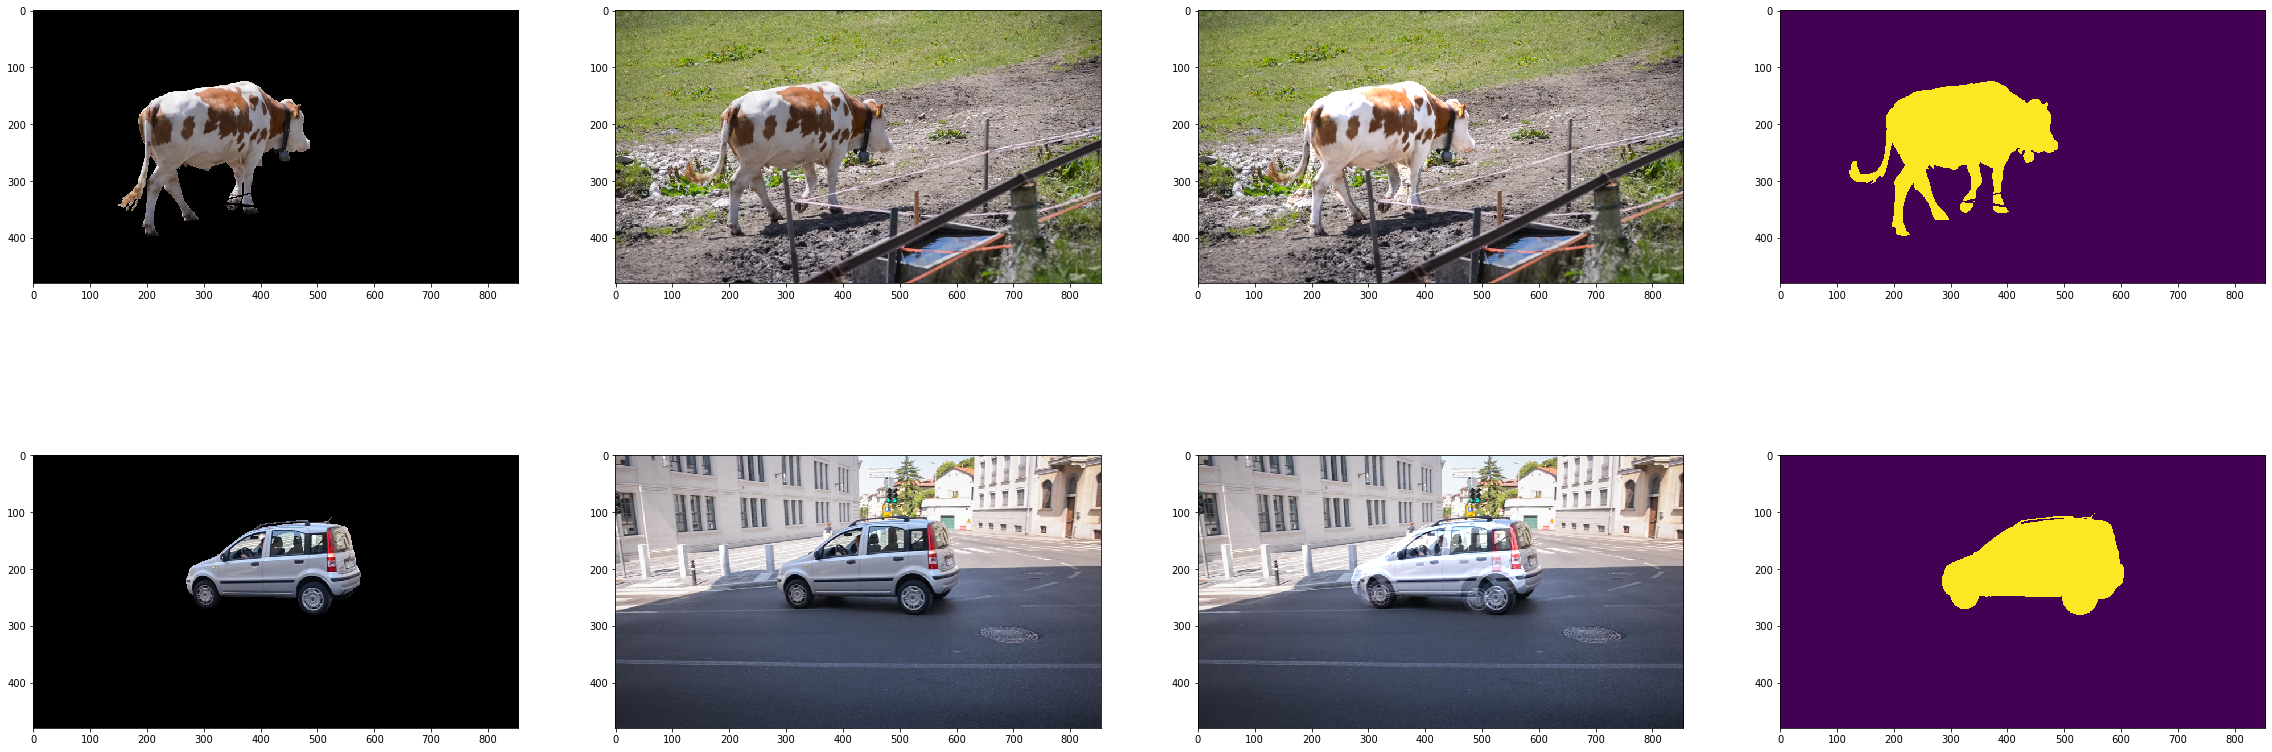

In [219]:
plt.figure(figsize=(40,15))
plt.subplot(241)
plt.imshow(input_batch[0,...,:3])
plt.subplot(242)
plt.imshow(input_batch[0,...,3:])
plt.subplot(243)
plt.imshow(input_batch[0,...,3:] + input_batch[0,...,:3] * 0.5)
plt.subplot(244)
plt.imshow(output_batch[0,...])
plt.subplot(245)
plt.imshow(input_batch[1,...,:3])
plt.subplot(246)
plt.imshow(input_batch[1,...,3:])
plt.subplot(247)
plt.imshow(input_batch[1,...,3:] + input_batch[1,...,:3] * 0.5)
plt.subplot(248)
plt.imshow(output_batch[1,...])
plt.show()

In [160]:
input_batch[0,...,:4].shape

(480, 854, 4)